In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Introducción

El Observatorio de Movilidad y Seguridad Vial (OMSV), organismo de la Ciudad Autónoma de Buenos Aires, solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.

Para este estudio, disponibiliza un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Se puede encontrar en https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales

Para el análisis exploratorio gráfico, utilizaremos principalmente `seaborn`, una librería de visualización de datos basada en `matplotlib`.

## Lectura de datos

In [6]:
df1=pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
df2=pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

In [7]:
df2.rename(columns={'ID_hecho': 'ID'}, inplace=True)

In [63]:
homicidios = df1.merge(df2, on='ID', how='inner')

In [64]:
homicidios.head()

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [68]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA_x                717 non-null    datetime64[ns]
 3   AAAA_x                 717 non-null    int64         
 4   MM_x                   717 non-null    int64         
 5   DD_x                   717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    category      
 12  Cruce                  540 non-null    object        
 13  Direc

In [66]:
homicidios.drop(['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'VICTIMA_y'], axis=1, inplace=True)

In [67]:
homicidios['Altura']=homicidios['Altura'].astype('category')
homicidios['COMUNA']=homicidios['COMUNA'].astype('category')
homicidios['EDAD']=pd.to_numeric(homicidios['EDAD'], errors='coerce').fillna(0).astype('int')

In [69]:
homicidios.describe()

,N_VICTIMAS,AAAA_x,MM_x,DD_x,EDAD
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,39.050209
std,0.257024,1.672655,3.575140,8.674876,22.010669
min,1.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,24.000000
50%,1.000000,2018.000000,7.000000,16.000000,35.000000
75%,1.000000,2019.000000,10.000000,23.000000,55.000000
max,3.000000,2021.000000,12.000000,31.000000,95.000000


In [12]:
homicidios['VICTIMA_x'].value_counts()

MOTO           302
PEATON         266
AUTO            92
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: VICTIMA_x, dtype: int64

In [13]:
homicidios['ACUSADO'].value_counts()

AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: ACUSADO, dtype: int64

In [14]:
homicidios['MM_x'].value_counts()

12    81
11    68
8     67
1     62
5     60
2     59
6     58
3     56
4     52
10    52
7     51
9     51
Name: MM_x, dtype: int64

In [60]:
homicidios_mes = homicidios.groupby(['MM_x'])['N_VICTIMAS'].sum()
homicidios_mes

MM_x
1     62
2     65
3     68
4     56
5     60
6     58
7     51
8     71
9     59
10    54
11    70
12    87
Name: N_VICTIMAS, dtype: int64

In [72]:
homicidios['EDAD'].value_counts()

0     53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: EDAD, Length: 86, dtype: int64

No se observa presencia de outliers en la edad ni en la cantidad de víctimas en un accidente, como tampoco de duplicados. Si se puede afirmar que en todos los registros hay valores faltantes, al aplicar el método 'dropna' el DataFrame quedó vacío, por lo tanto se procede a aceptar los registros que tengan algunos datos faltantes, dado que en las variables a analizar forman parte de menos del 10% en el mayor de los casos.

# Gráficos

### Histograma de edades


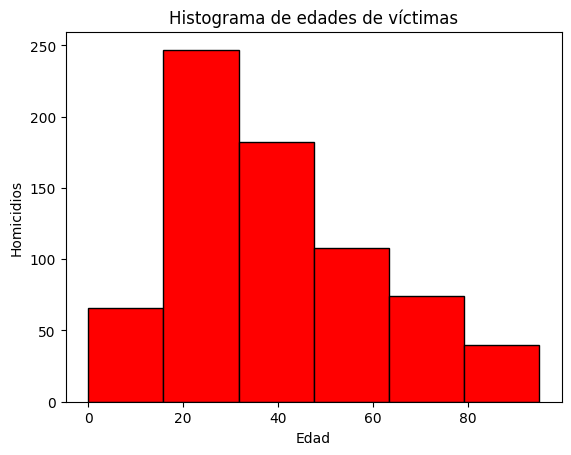

In [20]:
plt.hist(homicidios['EDAD'], bins=6, color='red', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Homicidios')
plt.title('Histograma de edades de víctimas')
plt.show()

En la lectura de información se pudo observar que las víctimas de accidentes de tránsito tienen en su mayoría 30 años hacia abajo, y como veremos en el gráfico siguiente, la mayor cantidad se movilizan en motos, por lo tanto creo que es importante hacer énfasis en estas dos variables, principalmente en el uso de cascos, instrumento vital para salvar vidas.

### Histograma de vehículos de víctimas


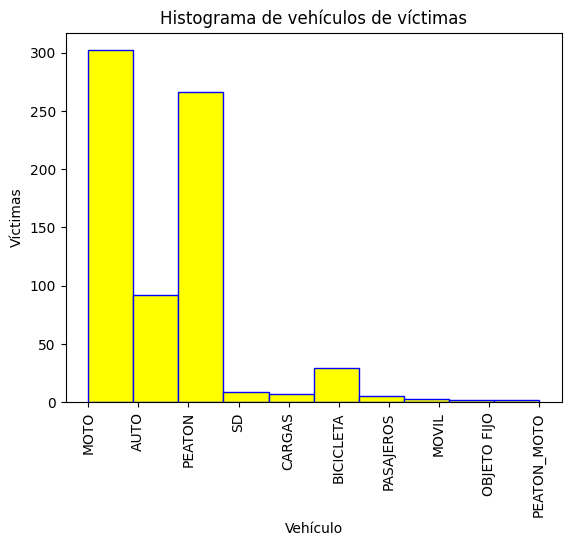

In [ ]:
plt.hist(homicidios['VICTIMA_x'], color='yellow', edgecolor='blue')
plt.xlabel('Vehículo')
plt.xticks(rotation=90)
plt.ylabel('Víctimas')
plt.title('Histograma de vehículos de víctimas')
plt.show()

### Histograma de vehículos de acusados
En este gráfico se observa que los principales culpables de estos siniestros son autos, vehículos de carga y los respectivos ocupantes de los vehículos. Creo que es muy importante hacer notar la responsabilidad que tiene un individuo que ocupa una movilidad, haciendo notar a conductores y ocupantes que están a bordo de un vehículo que puede llegar a ser un arma mortal.

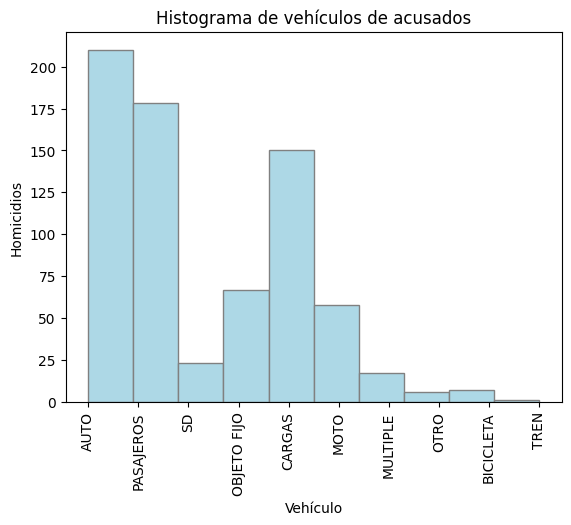

In [21]:
plt.hist(homicidios['ACUSADO'], color='lightblue', edgecolor='grey')
plt.xlabel('Vehículo')
plt.xticks(rotation=90)
plt.ylabel('Homicidios')
plt.title('Histograma de vehículos de acusados')
plt.show()

### Gráfiico de líneas por mes
Aquí se puede observar valores muy bajos en los meses de abril a julio, lo que puede hacer suponer que es debido a que es un período de muy bajas temperaturas y las personas pasan más tiempo en su hogar y salen menos. Sin embargo, desafortunadamente se puede notar un pico muy alto en el mes de diciembre, mes de fiestas y celebraciones, donde suelen ocurrir muchos siniestros viales, a pesar de la exhaustiva campaña de prevención que existe. Lo cual hace parecer que nunca es suficiente y hay que seguir fomentándola.

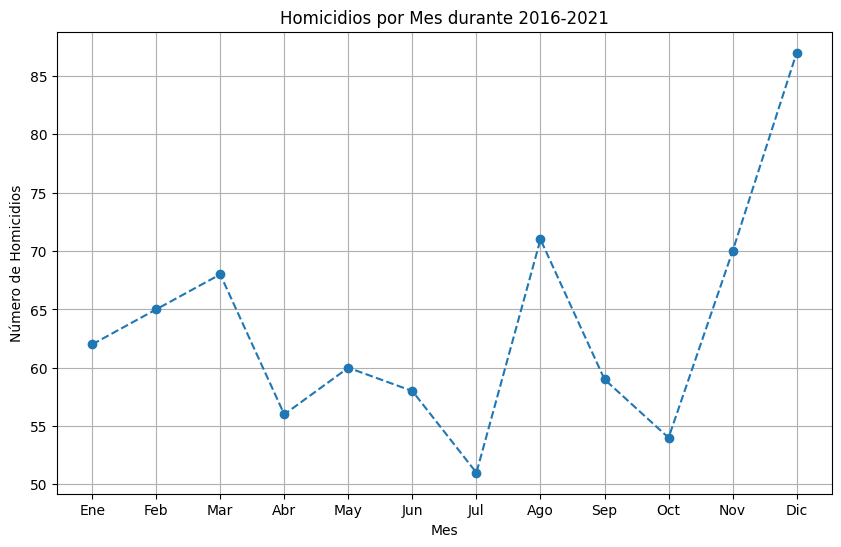

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(homicidios_mes, marker='o', linestyle='--')
plt.xlabel('Mes')
plt.ylabel('Número de Homicidios')
plt.title('Homicidios por Mes durante 2016-2021')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.show()

In [43]:
from pandas.core.reshape.pivot import pivot_table
tabla_pivot = pd.pivot_table(homicidios,index='VICTIMA_x',values='N_VICTIMAS',columns='ACUSADO', aggfunc='sum')
pivot = tabla_pivot.fillna('-')
pivot

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
VICTIMA_x,,,,,,,,,,
AUTO,37.0,-,17.0,-,3.0,38.0,1.0,12.0,4.0,-
BICICLETA,8.0,-,10.0,-,1.0,-,1.0,8.0,-,1.0
CARGAS,1.0,-,4.0,-,-,1.0,-,1.0,-,-
MOTO,86.0,2.0,84.0,25.0,8.0,40.0,4.0,58.0,9.0,-
MOVIL,-,-,4.0,-,-,-,-,1.0,-,-
OBJETO FIJO,4.0,-,-,-,-,-,-,-,-,-
PASAJEROS,1.0,-,-,-,-,-,-,3.0,1.0,-
PEATON,83.0,5.0,38.0,30.0,5.0,-,-,105.0,4.0,-
PEATON_MOTO,-,-,-,4.0,-,-,-,-,-,-


### Gráfico de barras de la relación entre la cantidad de víctimas por vehículo respecto a la movilidad de cada acusado
Este gráfico me pareció importante tenerlo a vista porque muestra notoriamente tanto las víctimas como los acusados respecto a cada vehículo, y se puede observar mucho mejor cómo las motos y los peatones son los más perjudicados, y quiénes son los principales culpables de accidentes.

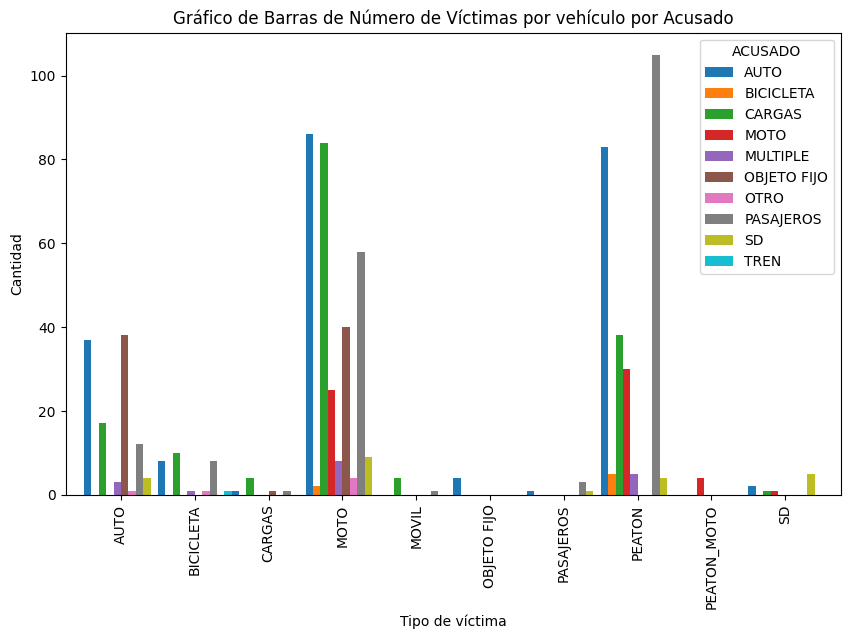

In [73]:
tabla_pivot.plot(kind='bar', figsize=(10, 6), width=1)
plt.xlabel('Tipo de víctima')
plt.ylabel('Cantidad')
plt.title('Gráfico de Barras de Número de Víctimas por vehículo por Acusado')
plt.show()